# Tutorial 07: Periodic boundary conditions

In this tutorial, we compute and relax a skyrmion in a interfacial-DMI (Cnv) material in a part of an infinitely large thin film.

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm

%matplotlib inline

We define mesh in cuboid through corner points `p1` and `p2`, and discretisation cell size `cell`.

In [2]:
region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), pbc='xy')

The mesh we defined is:

In [3]:
mesh.k3d()

Output()

Now, we can define the system object by first setting up the Hamiltonian:

In [4]:
system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.2e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 1e5)))

system.energy

Exchange(A=1.6e-11) + DMI(D=0.004, crystalclass='Cnv') + UniaxialAnisotropy(K=200000.0, u=(0, 0, 1)) + Zeeman(H=(0, 0, 100000.0))

Now, we need to define a function to define the initial magnetisation which is going to relax to skyrmion.

In [5]:
def m_init(pos):
    """Function to set initial magnetisation direction: 
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

system.m = df.Field(mesh, dim=3, value=m_init, norm=1.1e6)

The initial magnetsation is:

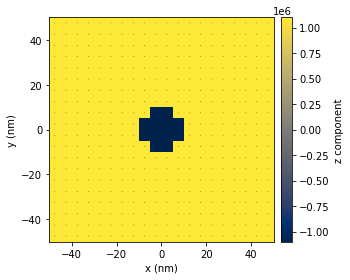

In [6]:
system.m.plane('z').mpl()

Finally we can minimise the energy and plot the magnetisation.

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:23]... (1.7 s)


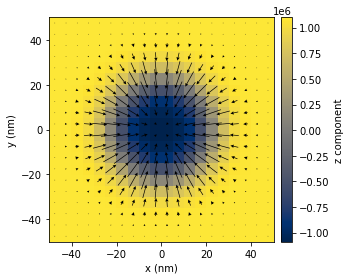

In [7]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

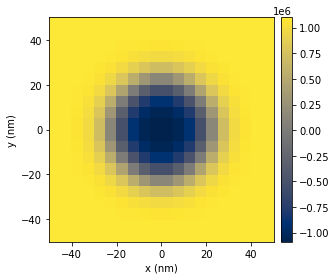

In [8]:
# Plot z-component only:
system.m.z.plane('z').mpl()

In [9]:
# 3d-plot of z-component
system.m.z.k3d_voxels(filter_field=system.m.norm)

Output()

Finally we can sample and plot the magnetisation along the line:

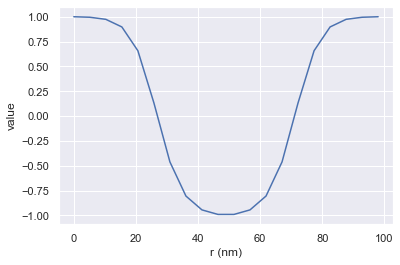

In [10]:
system.m.orientation.z.line(p1=(-49e-9, 0, 0), p2=(49e-9, 0, 0), n=20).mpl()